# West Nile Virus

## Sourcing and Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('/Users/ultimateflexer/Desktop/Datasets/predict-west-nile-virus/west_nile/input/train.csv')

In [3]:
weather_data = pd.read_csv('/Users/ultimateflexer/Desktop/Datasets/predict-west-nile-virus/west_nile/input/weather.csv')

In [4]:
train_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
weather_data.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [7]:
train_data.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [8]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [9]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [10]:
weather_data.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [11]:
weather_data['PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', 'M', '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

Many columns with numeric values contain the characters 'M' or 'T', so in order to convert these to numeric columns to use for statistical analysis, I am going to drop the rows with these values and convert the columns to numeric values.

In [12]:
weather_data = weather_data[~weather_data.PrecipTotal.str.contains('M')]
weather_data = weather_data[~weather_data.PrecipTotal.str.contains('T')]
weather_data['PrecipTotal'] = pd.to_numeric(weather_data['PrecipTotal'])

In [13]:
weather_data = weather_data[~weather_data.WetBulb.str.contains('M')]
weather_data = weather_data[~weather_data.WetBulb.str.contains('T')]
weather_data['WetBulb'] = pd.to_numeric(weather_data['WetBulb'])

In [14]:
weather_data = weather_data[~weather_data.Heat.str.contains('M')]
weather_data = weather_data[~weather_data.Heat.str.contains('T')]
weather_data['Heat'] = pd.to_numeric(weather_data['Heat'])

In [15]:
weather_data = weather_data[~weather_data.Cool.str.contains('M')]
weather_data = weather_data[~weather_data.Cool.str.contains('T')]
weather_data['Cool'] = pd.to_numeric(weather_data['Cool'])

In [16]:
weather_data = weather_data[~weather_data.AvgSpeed.str.contains('M')]
weather_data = weather_data[~weather_data.AvgSpeed.str.contains('T')]
weather_data['AvgSpeed'] = pd.to_numeric(weather_data['AvgSpeed'])

In [17]:
weather_data = weather_data[~weather_data.Tavg.str.contains('M')]
weather_data = weather_data[~weather_data.Tavg.str.contains('T')]
weather_data['Tavg'] = pd.to_numeric(weather_data['Tavg'])

In [18]:
weather_data = weather_data[~weather_data.SeaLevel.str.contains('M')]
weather_data = weather_data[~weather_data.SeaLevel.str.contains('T')]
weather_data['Tavg'] = pd.to_numeric(weather_data['SeaLevel'])

Now I am going to eliminate some of the unnecessary columnns in weather_data in order to reduce clutter and focus on important numerical columns.

In [19]:
weather_data.drop(['Depart', 'Sunrise', 'CodeSum', 'Sunset', 'Depth', 'Water1', 'SnowFall', 'StnPressure', 'ResultSpeed', 'ResultDir'], axis=1, inplace=True)

In [20]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2604 entries, 0 to 2943
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2604 non-null   int64  
 1   Date         2604 non-null   object 
 2   Tmax         2604 non-null   int64  
 3   Tmin         2604 non-null   int64  
 4   Tavg         2604 non-null   float64
 5   DewPoint     2604 non-null   int64  
 6   WetBulb      2604 non-null   int64  
 7   Heat         2604 non-null   int64  
 8   Cool         2604 non-null   int64  
 9   PrecipTotal  2604 non-null   float64
 10  SeaLevel     2604 non-null   object 
 11  AvgSpeed     2604 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 264.5+ KB


In [21]:
weather_data.describe()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,AvgSpeed
count,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000
mean,1.500000,76.331029,57.829493,29.969666,53.588710,59.434716,3.348310,5.683948,0.147788,8.505184
std,0.500096,11.377345,10.327899,0.159499,10.629197,9.222563,5.887637,6.075934,0.414979,3.138153
min,1.000000,41.000000,29.000000,29.230000,22.000000,32.000000,0.000000,0.000000,0.000000,1.700000
25%,1.000000,69.000000,50.000000,29.870000,46.000000,53.000000,0.000000,0.000000,0.000000,6.200000
50%,1.500000,79.000000,59.000000,29.970000,55.000000,61.000000,0.000000,4.000000,0.000000,8.000000
75%,2.000000,85.000000,66.000000,30.070000,62.000000,67.000000,5.000000,10.000000,0.090000,10.300000
max,2.000000,104.000000,83.000000,30.530000,75.000000,78.000000,29.000000,29.000000,6.860000,26.300000


train_data looks good for now, so I am not going to make any changes to that dataframe, rather extract the important features later on when reducing dimensionality for modeling.

## Exploratory Data Analysis

I am going to start by exploring train_data.

In [22]:
train_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

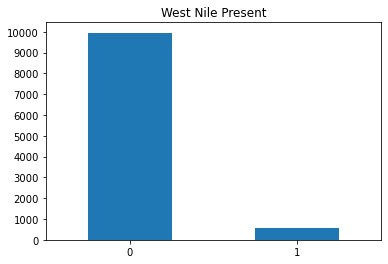

In [23]:
train_data['WnvPresent'].value_counts().plot(kind='bar', 
                                     title='West Nile Present')
plt.yticks(ticks=range(0,10001, 1000))
plt.xticks(rotation=0)

In [24]:
num_Wnv = train_data['WnvPresent'].value_counts()
print(num_Wnv)

0    9955
1     551
Name: WnvPresent, dtype: int64


Not many cases of West Nile Virus were found in the train set, approximately 5.5%.

In [25]:
train_data['Species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)